In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
res=pd.read_csv("./model_history_final_250.csv")
res = res.drop(0)
res.head()

,epoch,auc,dice,loss,precision,recall,val_auc,val_dice,val_loss,val_precision,val_recall
1,1,0.499812,0.354645,0.645356,0.302339,0.539400,0.499326,0.362390,0.637610,0.299522,0.395768
2,2,0.500251,0.356506,0.643494,0.302614,0.550846,0.499609,0.364407,0.635593,0.299879,0.451027
3,3,0.500375,0.358172,0.641827,0.302667,0.562786,0.499891,0.366381,0.633619,0.300184,0.504077
4,4,0.500674,0.359776,0.640224,0.302824,0.575675,0.500162,0.368131,0.631869,0.300443,0.554115
5,5,0.500862,0.361204,0.638796,0.302902,0.589180,0.500423,0.369590,0.630410,0.300593,0.599059


In [14]:
f1score = []
val_f1score = []
for index, row in res.iterrows():
    precision, recall = row["precision"], row["recall"]
    f1 = 2*precision*recall/(precision+recall)
    f1score.append(f1)
    
    val_precision, val_recall = row["val_precision"], row["val_recall"]
    val_f1 = 2*val_precision*val_recall/(val_precision+val_recall)
    val_f1score.append(val_f1)
    
res["f1"] = f1score
res["val_f1"] = val_f1score
res.head()

,epoch,auc,dice,loss,precision,recall,val_auc,val_dice,val_loss,val_precision,val_recall,f1,val_f1
1,1,0.499812,0.354645,0.645356,0.302339,0.539400,0.499326,0.362390,0.637610,0.299522,0.395768,0.387488,0.340984
2,2,0.500251,0.356506,0.643494,0.302614,0.550846,0.499609,0.364407,0.635593,0.299879,0.451027,0.390630,0.360241
3,3,0.500375,0.358172,0.641827,0.302667,0.562786,0.499891,0.366381,0.633619,0.300184,0.504077,0.393636,0.376285
4,4,0.500674,0.359776,0.640224,0.302824,0.575675,0.500162,0.368131,0.631869,0.300443,0.554115,0.396878,0.389628
5,5,0.500862,0.361204,0.638796,0.302902,0.589180,0.500423,0.369590,0.630410,0.300593,0.599059,0.400106,0.400317


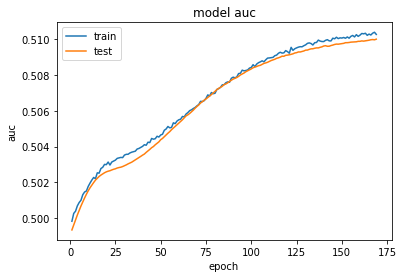

In [15]:
plt.plot(res['auc'])
plt.plot(res['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

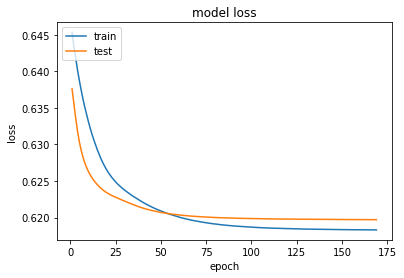

In [16]:
plt.plot(res['loss'])
plt.plot(res['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

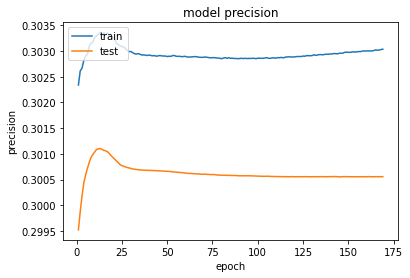

In [17]:
plt.plot(res['precision'])
plt.plot(res['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

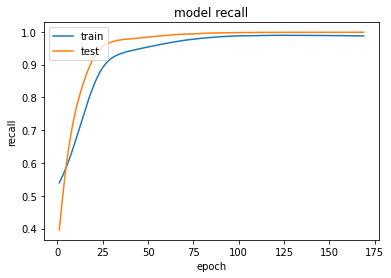

In [18]:
plt.plot(res['recall'])
plt.plot(res['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

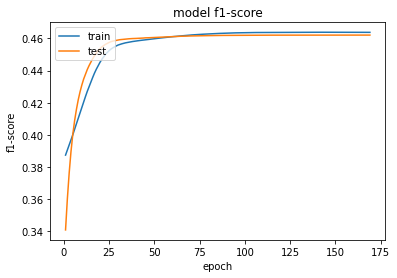

In [19]:
plt.plot(res['f1'])
plt.plot(res['val_f1'])
plt.title('model f1-score')
plt.ylabel('f1-score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [23]:
from tabulate import tabulate
tmp = [(168, res.loc[168]["val_auc"], res.loc[168]["val_loss"], res.loc[168]["val_precision"], res.loc[168]["val_recall"], res.loc[168]["val_f1"])]
title = ["epoch", "test_auc", "test_loss", "test_precision", "test_recall", "test_f1"]
print(tabulate(tmp, headers=title))

  epoch    test_auc    test_loss    test_precision    test_recall    test_f1
-------  ----------  -----------  ----------------  -------------  ---------
    168     0.50998     0.619704          0.300558       0.998839   0.462074
